In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DataSet_Shirt.csv')
df.head()

,Chest,Shoulder,Sleeve_Length,Waist,Predicted_Size
0,86.0,39.5,45.5,71.0,1
1,86.0,39.5,45.5,71.5,1
2,86.0,39.5,45.5,72.0,1
3,86.0,39.5,45.5,72.5,1
4,86.0,39.5,45.5,73.0,1


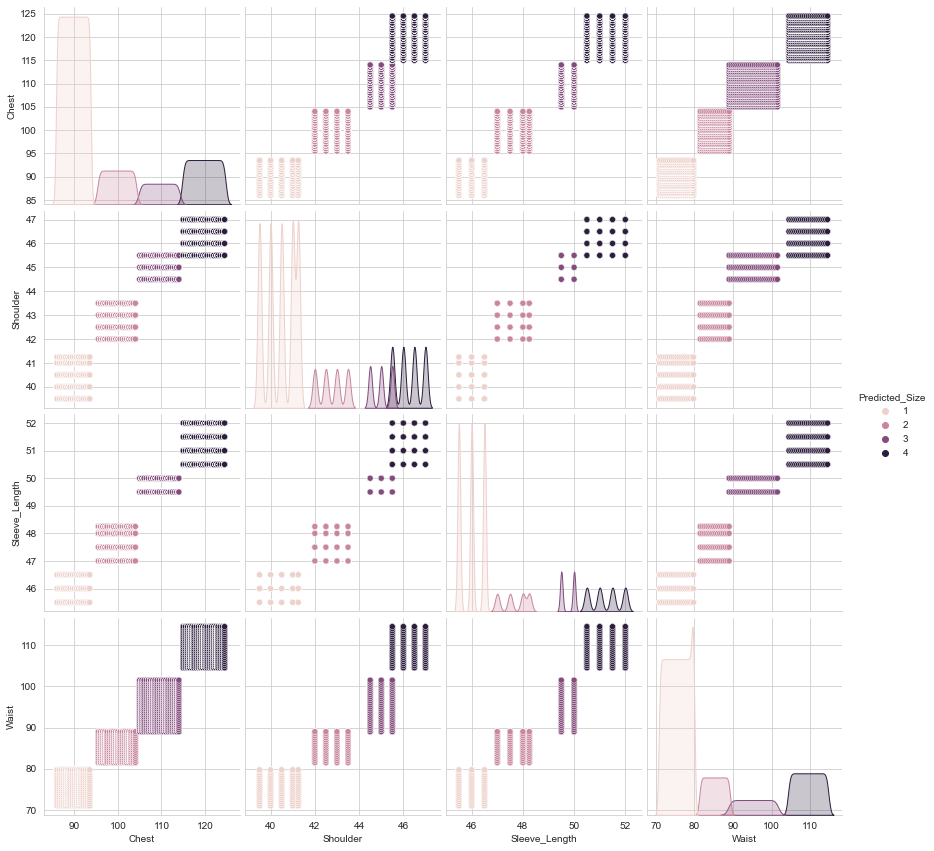

In [3]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Predicted_Size", height=3);
plt.show()

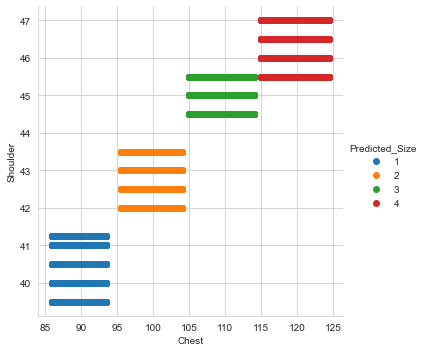

In [4]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue='Predicted_Size', height=5) \
.map(plt.scatter, "Chest", "Shoulder") \
.add_legend();
plt.show()

In [5]:
df.head()

,Chest,Shoulder,Sleeve_Length,Waist,Predicted_Size
0,86.0,39.5,45.5,71.0,1
1,86.0,39.5,45.5,71.5,1
2,86.0,39.5,45.5,72.0,1
3,86.0,39.5,45.5,72.5,1
4,86.0,39.5,45.5,73.0,1


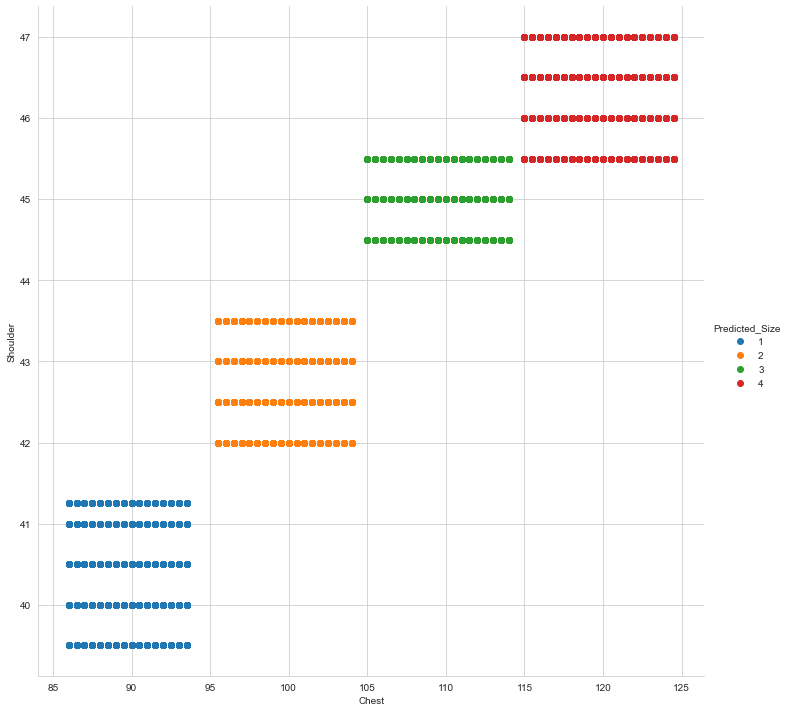

In [6]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue='Predicted_Size', height=10) \
.map(plt.scatter, "Chest", "Shoulder") \
.add_legend();
plt.show()

In [7]:
x_data = df.drop(['Predicted_Size'],axis=1)
y_data = df['Predicted_Size']
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) 

ypred

array([1, 1, 2, ..., 1, 4, 1], dtype=int64)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[4584    0    0    0]
 [   0  909    0    0]
 [   0    0  566    0]
 [   0    0    0 1360]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4584
           2       1.00      1.00      1.00       909
           3       1.00      1.00      1.00       566
           4       1.00      1.00      1.00      1360

    accuracy                           1.00      7419
   macro avg       1.00      1.00      1.00      7419
weighted avg       1.00      1.00      1.00      7419

Accuracy: 1.0


In [9]:
X_test.shape

(7419, 4)

In [10]:
type(X_test)

pandas.core.frame.DataFrame

In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7419 entries, 22148 to 19230
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Chest          7419 non-null   float64
 1   Shoulder       7419 non-null   float64
 2   Sleeve_Length  7419 non-null   float64
 3   Waist          7419 non-null   float64
dtypes: float64(4)
memory usage: 289.8 KB


In [12]:
ypred=knn_clf.predict([[93.265802,45.572916,49.999654,81.902249]]) 
ypred[0]

2

In [13]:
X_train.head(10)

,Chest,Shoulder,Sleeve_Length,Waist
11240,89.5,40.50,45.5,76.5
1408,86.0,41.25,46.5,72.0
10483,89.5,41.00,46.5,78.0
843,86.0,41.25,46.5,74.5
14791,91.0,41.25,46.0,75.5
27217,104.0,42.50,47.0,82.0
28958,109.5,45.50,50.0,97.0
36086,123.5,45.50,50.5,105.5
12548,90.0,39.50,45.5,75.0
36741,124.0,47.00,52.0,107.5
